<a href="https://colab.research.google.com/github/chandrap08/ml-code/blob/master/cifar10_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#print the shape of training, testing, and label data
print('Training Data Shape: ', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

print('Label Training Data Shape: ', y_train.shape)
print('Label Testing Data Shape: ', y_test.shape)

170508288/170498071 [==============================] - 6s 0us/step
Training Data Shape:  (50000, 32, 32, 3)
Testing Data Shape:  (10000, 32, 32, 3)
Label Training Data Shape:  (50000, 1)
Label Testing Data Shape:  (10000, 1)


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

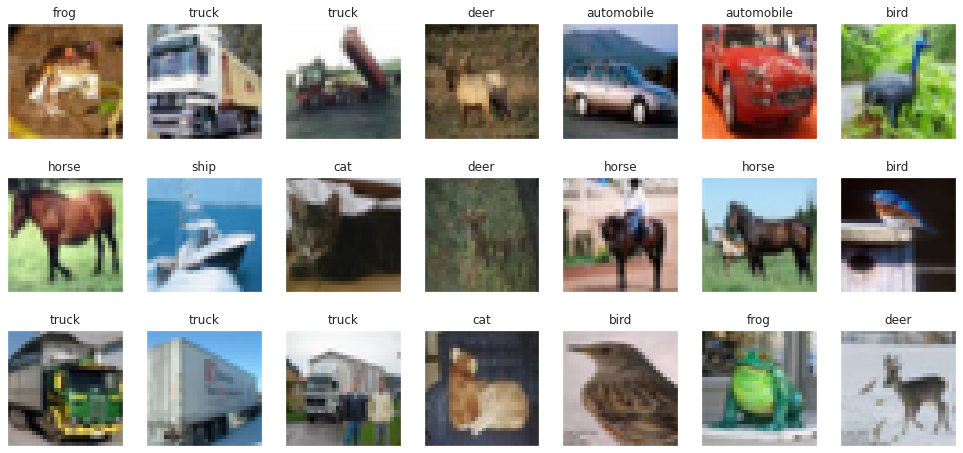

In [7]:
# Display the first 21 images of X_train
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [8]:
# Convert both X_train and X_test to grayscale
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])


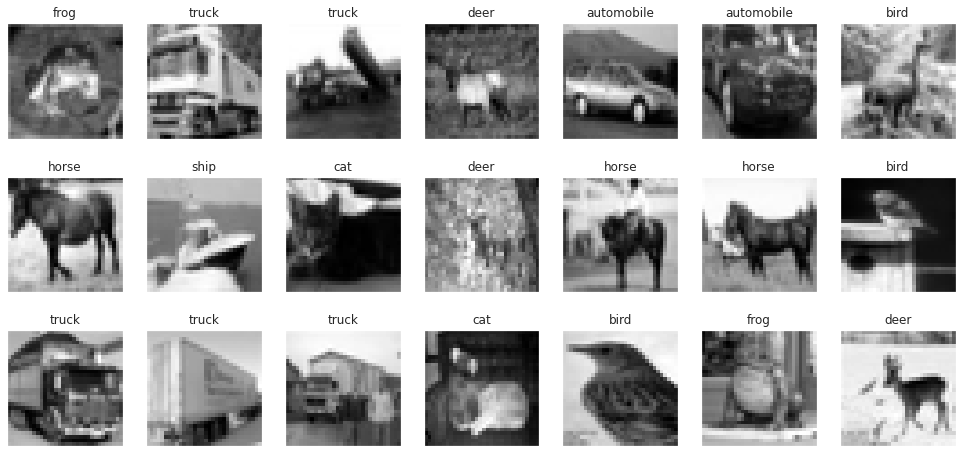

In [9]:
# Display the first 21 images of X_train (grayscale)
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [10]:
# Value normalization
X_train  = X_train/255
X_test  = X_test/255


In [11]:
# Label preprocessing
one_hot_encoder = OneHotEncoder(sparse=False)

one_hot_encoder.fit(y_train)

OneHotEncoder(sparse=False)

In [12]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)


In [13]:
X_train.shape

(50000, 32, 32)

In [4]:
#flatten images
x_train_flat = X_train.reshape(-1,3072)
feat_cols = ['pixel' + str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat, columns = feat_cols)
df_cifar['Label'] = y_train
print('Size of Data Frame: {}'.format(df_cifar.shape))

Size of Data Frame: (50000, 3073)


In [5]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,Label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1


In [6]:
#create PCA method
pca_cifar = PCA(n_components = 2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:, :-1])

In [7]:
#convert principal components
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar,
                                  columns = ['Principal Component 1', 'Principal Component 2'])
principal_cifar_Df['Label'] = y_train
principal_cifar_Df.head()

,Principal Component 1,Principal Component 2,Label
0,-1632.259496,695.904888,6
1,211.594763,-242.235513,9
2,1971.200943,-2938.136108,9
3,-2638.693419,2.738208,4
4,-669.541001,-1267.156182,1


In [8]:
#variance of principal components
print('Explained Variation per Principal Component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained Variation per Principal Component: [0.2907663  0.11253144]


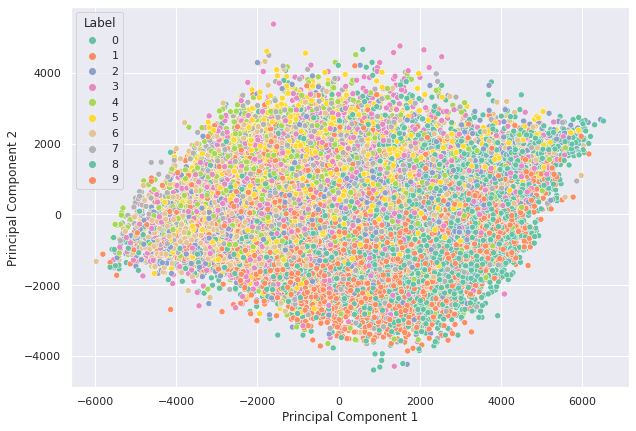

In [9]:
#plotting dataset into 2d graph
plt.figure(figsize = (10,7))
sns.scatterplot(
    x = "Principal Component 1", y = "Principal Component 2",
    hue = "Label",
    palette = sns.color_palette("Set2", 10),
    data = principal_cifar_Df,
    legend = "full",
    alpha = 1.0
)

In [10]:
X_test = X_test.reshape(-1, 32, 32, 3)
x_test_flat = X_test.reshape(-1, 3072)

In [11]:
pca = PCA(0.99)
pca.fit(x_train_flat)
PCA(copy = True, iterated_power = 'auto', n_components = 0.99, random_state = None, svd_solver = 'auto', tol = 0.0, whiten = False)
pca.n_components_

658

In [12]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

In [ ]:
# next step we apply clustering to the above image sets.

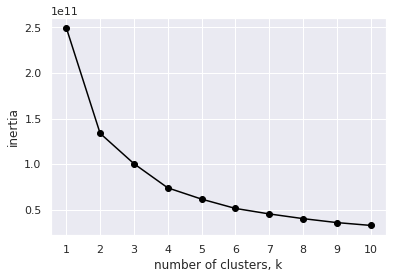

In [14]:
ks = range(1, 11)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to samples
    model.fit(principal_cifar_Df.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4)
kmeans.fit(train_img_pca)

In [ ]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = principalComponents_cifar[:, 0].min() - 1, principalComponents_cifar[:, 0].max() + 1
y_min, y_max = principalComponents_cifar[:, 1].min() - 1, principalComponents_cifar[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(principal_cifar_Df[:, 0], principal_cifar_Df[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on cifar-10 dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()